###  Libraries

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_kernels
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tslearn.clustering import KernelKMeans as TSKernelKMeans
from Initialization import Initialization
from KernelKMeans import KernelKMeans
from GlobalKernelKMeans import GlobalKernelKMeans, GlobalKernelKMeansPP 
from Rings import Rings
from Common_Modules.Evaluation import Evaluator

### Global Variables

In [ ]:
seed = 42
evaluator = Evaluator()
kMeans_is_enabled = False
kernelKMeans_is_enabled = False
kernelKMeansPP_is_enabled = True
globalKernelKMeans_is_enabled = False
globalKernelKMeansPP_is_enabled = True

### Load Dataset

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'black', 'cyan', 'gray', 'lime']

# Generate 5 pairs of data with specified center positions and unique IDs for each ring
centers_coordinates = [(-1, 2), (2, 2), (2, 5), (2, -1), (5, 2), (6, 6), (-2, 6), (2, 8), (6, -2), (2, -4), (-2, -2)]  # Specify center positions for each pair
#centers_coordinates = [(2, 2), (-2, 2)]
rings = Rings()

X, y = rings.make_rings_pairs(centers_coordinates=centers_coordinates, n_samples=100, factor=0.2, noise=0.0)
#from sklearn.datasets import make_blobs
#X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

#X, y = rings.remove_samples_with_specific_label(X, y, 3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors))

In [ ]:
K = 11
kernel_matrix = pairwise_kernels(X, X, metric='rbf', gamma=1)

### kMeans

In [ ]:
if(kMeans_is_enabled):
    kmeans = KMeans(n_clusters=K).fit(X)
    acc, pur, nmi, ari = evaluator.evaluate_model(y, kmeans.labels_)
    evaluator.print_evaluation()
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=ListedColormap(colors))

### Kernel kMeans

In [ ]:
if(kernelKMeans_is_enabled):
    kernel_kmeans = TSKernelKMeans(n_clusters=K, n_init=10, kernel='precomputed').fit(kernel_matrix)
    acc, pur, nmi, ari = evaluator.evaluate_model(y, kernel_kmeans.labels_)
    evaluator.print_evaluation()
    plt.scatter(X[:, 0], X[:, 1], c=kernel_kmeans.labels_, cmap=ListedColormap(colors))
    plt.show()

### Kernel kMeans++

ACC: 0.68 PUR: 0.76 NMI: 0.89 ARI: 0.70


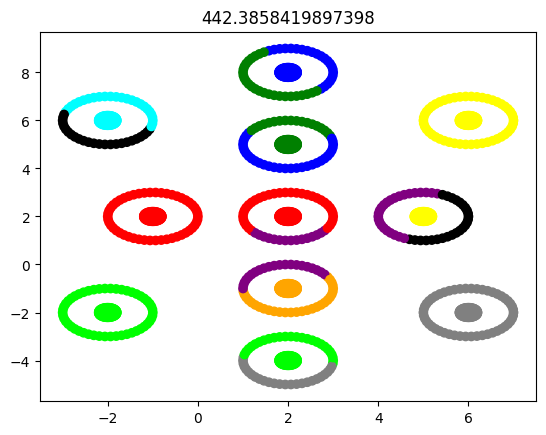

Ground Truth Error is: 421.793764703285


In [33]:
if(kernelKMeansPP_is_enabled):
    kernelKMeans = KernelKMeans(n_clusters=22, kernel_matrix=kernel_matrix, n_init=150, init='k-means++', verbose=0)
    kernelKMeans.fit(X)
    acc, pur, nmi, ari = evaluator.evaluate_model(y, kernelKMeans.labels_)
    evaluator.print_evaluation()
    plt.scatter(X[:, 0], X[:, 1], c=kernelKMeans.labels_, cmap=ListedColormap(colors))
    plt.title(kernelKMeans.inertia_)
    plt.show()

    # That's the function of grount truth error
    ground_truth_error = kernelKMeans.calculate_ground_truth_error(y)
    print(f"Ground Truth Error is: {ground_truth_error}")

### Global Kernel kMeans

In [8]:
if(globalKernelKMeans_is_enabled):
    globalKernelKMeans = GlobalKernelKMeans(n_clusters=K, kernel_matrix=kernel_matrix, verbose=1)
    globalKernelKMeans.fit(X)
    acc, pur, nmi, ari = evaluator.evaluate_model(y, globalKernelKMeans.labels_[K])
    evaluator.print_evaluation()
    plt.scatter(X[:, 0], X[:, 1], c=globalKernelKMeans.labels_[K], cmap=ListedColormap(colors))
    plt.title(globalKernelKMeans.inertia_[K])
    plt.show()

KeyboardInterrupt: 

### Global Kernel kMeans++

Solving 2-means
Solving 3-means
Solving 4-means
Solving 5-means
Solving 6-means
Solving 7-means
Solving 8-means
Solving 9-means
Solving 10-means
Solving 11-means
ACC: 0.50 PUR: 0.50 NMI: 0.87 ARI: 0.64


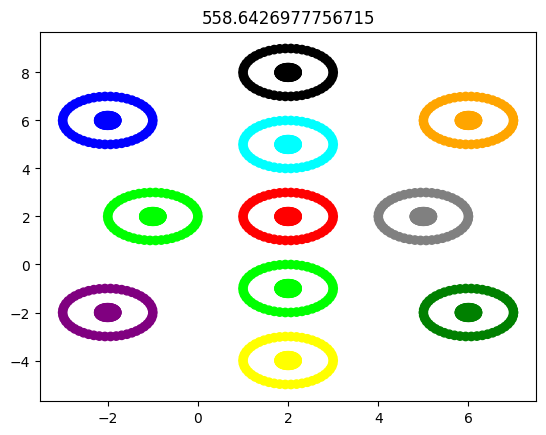

In [34]:
if(globalKernelKMeansPP_is_enabled):
    globalKernelKMeansPP = GlobalKernelKMeansPP(n_clusters=K, kernel_matrix=kernel_matrix, n_candidates=150, sampling='batch', verbose=2)
    globalKernelKMeansPP.fit(X)
    acc, pur, nmi, ari = evaluator.evaluate_model(y, globalKernelKMeansPP.labels_[K])
    evaluator.print_evaluation()
    plt.scatter(X[:, 0], X[:, 1], c=globalKernelKMeansPP.labels_[K], cmap=ListedColormap(colors))
    plt.title(globalKernelKMeansPP.inertia_[K])
    plt.show()

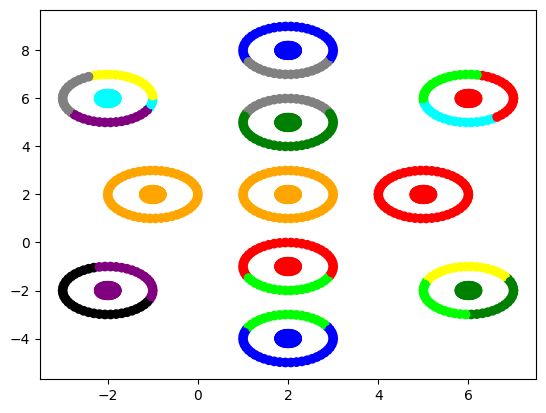

In [30]:
from sklearn.cluster import SpectralClustering
def Spectral_Clustering(n_clusters, X, affinity='rbf', sigma = 1):
    # Set gamma according to sigma
    gamma = 1.0

    # Initialize the Spectral Clustering Model
    spectral_clustering_model = SpectralClustering(n_clusters=n_clusters, affinity=affinity, gamma=gamma, n_init=100)

    # Fit the Spectral Clustering Model to X
    spectral_clustering_model.fit(X)

    return spectral_clustering_model

Spectral_Clustering_model = Spectral_Clustering(22, X, sigma=1.0)
plt.scatter(X[:, 0], X[:, 1], c=Spectral_Clustering_model.labels_, cmap=ListedColormap(colors))

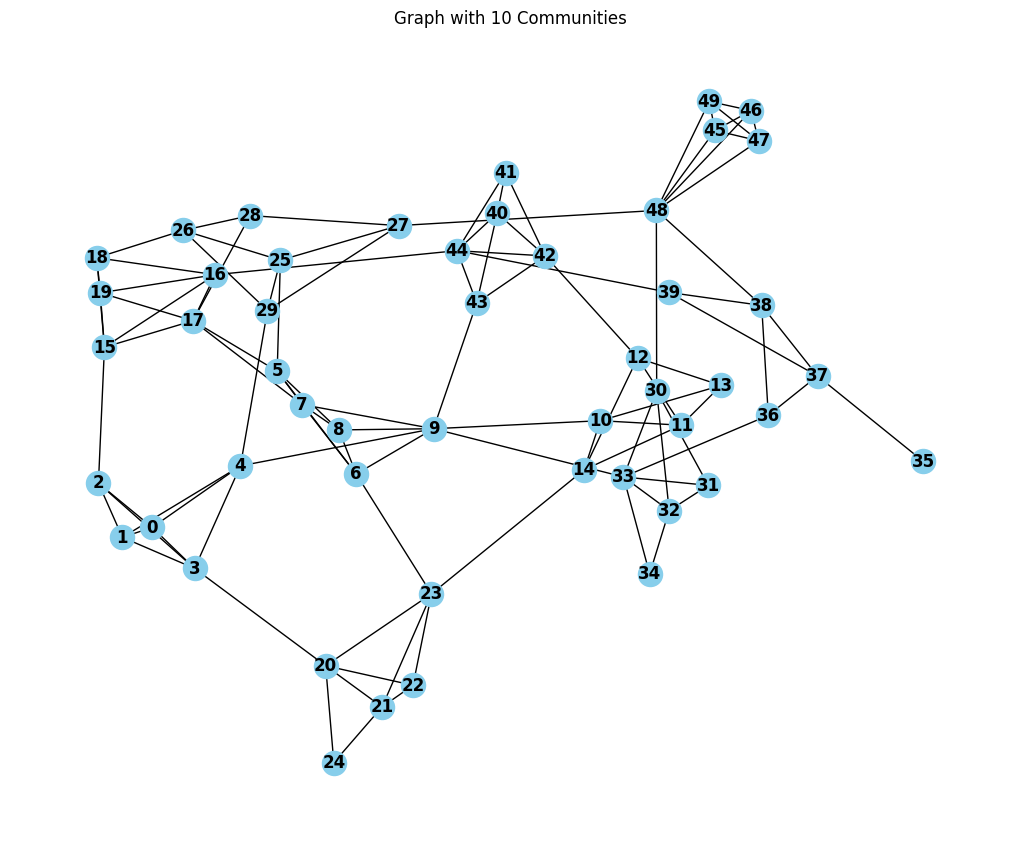

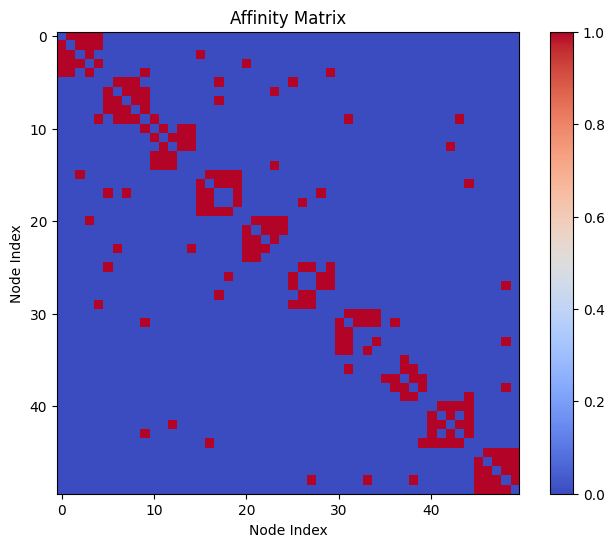

[0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [100]:
import networkx as nx
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Number of nodes per community
num_nodes_per_community = 5

# Number of communities
num_communities = 10

# Probability matrix for inter-community edges
# Adjust these probabilities as desired
p_intra = 0.85  # Probability of intra-community edge
p_inter = 0.015  # Probability of inter-community edge

# Construct the probability matrix
p_matrix = np.ones((num_communities, num_communities)) * p_inter
np.fill_diagonal(p_matrix, p_intra)

# Create a graph with stochastic block model
G = nx.generators.community.stochastic_block_model(
    sizes=[num_nodes_per_community] * num_communities,  # Sizes of communities
    p=p_matrix  # Probability matrix for inter-community edges
)

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, font_size=12, font_weight='bold')
plt.title("Graph with 10 Communities")
plt.show()

# Affinity matrix
adj_matrix = nx.to_numpy_array(G)
plt.figure(figsize=(8, 6))
plt.imshow(adj_matrix, cmap='coolwarm', origin='upper')
plt.colorbar()
plt.title('Affinity Matrix')
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.show()